


Youtube presentation link: https://youtu.be/q2_bZ8O1ulk




TEAM ID 048

# 1) Introduction


**High-Level Description:**

This paper presents a novel algorithm called Hierarchical Curriculum Learning (HiCu) for automated ICD coding, which is the process of assigning multiple International Classification of Diseases (ICD) codes to clinical notes. The goal of HiCu is to improve the accuracy of ICD code prediction, particularly for rare labels, by leveraging the hierarchical structure of ICD codes.

**Contribution:**

HiCu innovates by using a depth-wise decomposition of the label graph combined with a hyperbolic-embedding-based knowledge transfer mechanism. This approach respects the hierarchical relationships among ICD codes and enables the model to learn from both frequent and rare labels effectively. HiCu also incorporates an asymmetric loss function to balance the learning between frequent and rare labels.

**Significance:**

HiCu significantly advances the field of automated ICD coding by addressing key limitations of previous models. It improves the performance on rare labels, which are often neglected by traditional models, and enhances the generalization capabilities of models across various neural architectures. HiCu's approach could be adapted to other hierarchical multi-label classification problems, making it a substantial contribution to the broader research community in machine learning and healthcare informatics.


#2) Scope of Reproducibility

Hypothesis 1: HiCu improves the prediction accuracy of ICD codes, especially for rare labels, by leveraging the hierarchical structure of the ICD code system.

Experiment 1: Compare the performance of HiCu against baseline models (e.g., RNN, CNN, Transformer without HiCu) on a dataset with a skewed label distribution like MIMIC-III. Use metrics such as Macro-AUC, Micro-AUC, and F1 scores to assess improvements specifically for rare labels.


---


Hypothesis 2: The hierarchical curriculum learning approach proposed by HiCu, which includes depth-wise decomposition and hyperbolic embeddings, leads to better model generalization across different neural network architectures.

Experiment 2: Implement the HiCu curriculum learning on different neural network architectures (e.g., RNN, CNN, Transformer) and compare their performance on the multi-label ICD coding task using the MIMIC-III dataset. Metrics to be compared include overall accuracy, loss convergence rates, and performance stability across training epochs.


---


Hypothesis 3: HiCu's integration of an asymmetric loss function effectively addresses the label imbalance issue, improving the predictive performance on both frequent and rare ICD codes.

Experiment 3: Evaluate the impact of the asymmetric loss function in the HiCu model by conducting ablation studies where the model is trained with and without the asymmetric loss function. Performance should be analyzed in terms of precision, recall, and F1 score for both rare and frequent labels.


---


Hypothesis 4: The hyperbolic embedding-based knowledge transfer in HiCu enhances the learning efficiency and accuracy by effectively utilizing the hierarchical information of ICD codes.

Experiment 4: Compare the training efficiency (time to convergence, number of epochs required) and accuracy before and after introducing hyperbolic embeddings in the HiCu algorithm. Additionally, visualize the embeddings to inspect if hierarchical relations among ICD codes are preserved.
These experiments are designed to thoroughly test the claims made in the paper regarding the effectiveness of the HiCu model in improving the accuracy and efficiency of ICD code prediction from clinical texts. Each hypothesis focuses on a specific aspect of the HiCu method, providing a comprehensive validation framework for the paper's claims.

#3) Methodology

## Environment: Python Version and Dependencies/Packages Needed


In [ ]:
#python=3.10.12

#Packages dependencies:
!pip install gensim==4.3.2
!pip install nltk==3.8.1
!pip install numpy==1.23.5
!pip install pandas==1.5.3
!pip install scikit-learn==1.2.2
!pip install scipy==1.11.3
!pip install tqdm==4.66.1
!pip install transformers==4.35.2
!pip install packaging==23.2
!pip install torch==2.2.1
!python -m pip install torch==2.0.1+cu118 torchvision torchaudio --index-url https://download.pytorch.org/whl/
!pip install --upgrade torchaudio torchvision torchtext

## Data




### Data download instruction:

Our data preprocessing follows [MultiResCNN](https://github.com/foxlf823/Multi-Filter-Residual-Convolutional-Neural-Network) and [CAML](https://github.com/jamesmullenbach/caml-mimic) with slight modifications. To set up the dataset, follow the instructions below:

1. Download MIMIC-III dataset from [PhysioNet](https://physionet.org/content/mimiciii/1.4/).

2. Place the MIMIC-III files into `/data` as shown below:
```
data
|   D_ICD_DIAGNOSES.csv
|   D_ICD_PROCEDURES.csv
└───mimic3/
|   |   NOTEEVENTS.csv
|   |   DIAGNOSES_ICD.csv
|   |   PROCEDURES_ICD.csv
|   |   train_full_hadm_ids.csv
|   |   train_50_hadm_ids.csv
|   |   dev_full_hadm_ids.csv
|   |   dev_50_hadm_ids.csv
|   |   test_full_hadm_ids.csv
|   |   test_50_hadm_ids.csv
```
The `*_hadm_ids.csv` files can be found in the [CAML repository](https://github.com/jamesmullenbach/caml-mimic)

### Data descriptions with helpful chats and visualizations

- Source of the Data: The dataset used in this study is the Medical Information Mart for Intensive Care (MIMIC-III) dataset. MIMIC-III is a publicly available dataset developed by the MIT Lab for Computational Physiology, containing de-identified health-related data associated with over forty thousand patients who stayed in critical care units of the Beth Israel Deaconess Medical Center between 2001 and 2012. The dataset includes a diverse array of measurements such as lab tests, vital signs, medications, and more. It is widely used in medical research for developing and validating health care algorithms. The dataset can be accessed at PhysioNet.

- Statistics: The MIMIC-III dataset used in this paper includes 52,722 discharge summaries associated with unique patient stays. These discharge summaries are annotated with ICD-9 codes, where the dataset comprises 8,929 unique codes. For the training purposes, the data was split into distinct sets: 47,719 summaries for training, 1,631 for validation, and 3,372 for testing. The label distribution follows a power-law, indicative of a few common codes and a long tail of rare codes, which aligns with real-world medical coding scenarios where most diagnoses are uncommon.

- Data Process: The raw text from discharge summaries was preprocessed to lower case and punctuation was removed to standardize the input for model training. The dataset was split into training, validation, and testing sets based on unique patient identifiers, ensuring that all notes from a single patient were only included in one of the sets to prevent data leakage. For feature engineering, word embeddings were pretrained using the Word2Vec model on the corpus of discharge summaries, which helped in capturing semantic similarities between medical terms.



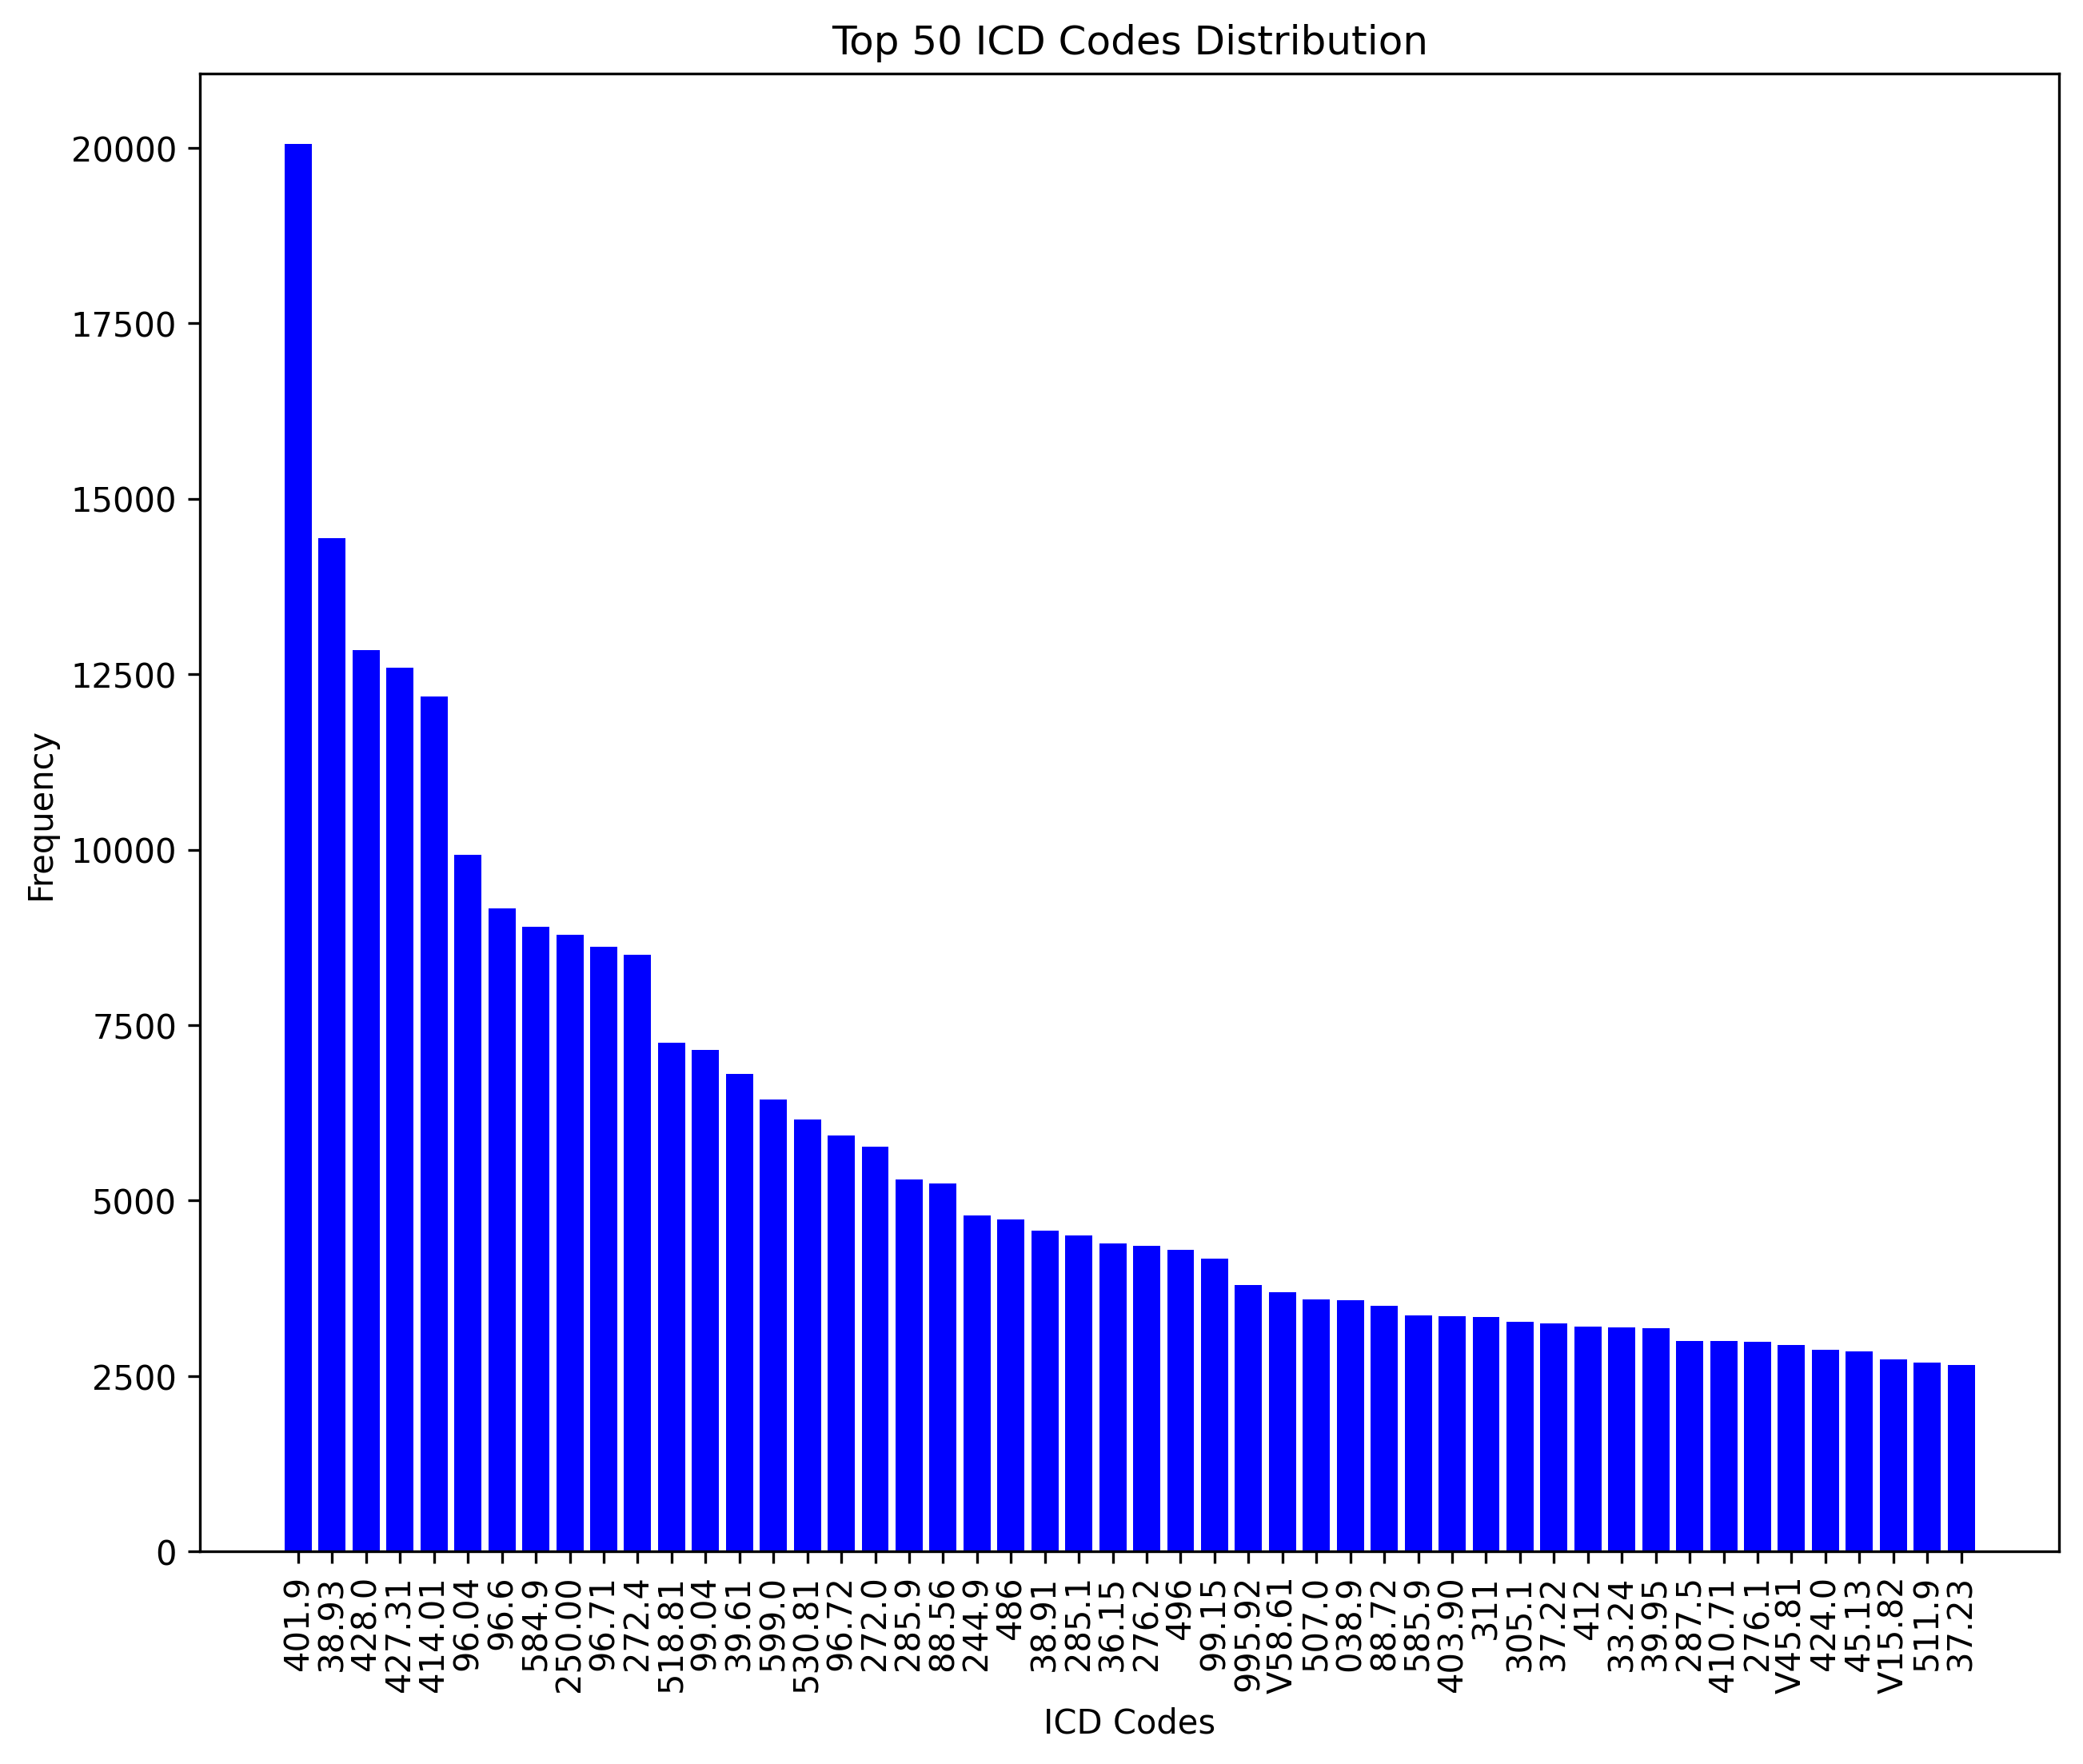


### Preprocessing code + command:
- Run ```python preprocess_mimic3.py``` to preprocess the data.


## Model

### Citation to the original paper
- Original Paper: [HiCu: Leveraging Hierarchy for Curriculum Learning in Automated ICD Coding](https://arxiv.org/abs/2208.02301)


### Link to the original paper's repo
- Original Github repo: [HiCu-ICD](https://github.com/wren93/HiCu-ICD/tree/main)




### Model descriptions

Model architecture:

- Overview: The model is built upon a hierarchical curriculum learning framework (HiCu) that integrates with various neural network architectures including RNNs, CNNs, and Transformers.
- Layers:
  - Encoder: Each architecture (Bi-LSTM, MultiResCNN, RAC reader) uses a unique encoding mechanism to transform input texts into dense embeddings. For instance, MultiResCNN employs multiple convolutional layers with varying kernel sizes to capture textual features at different granularities.
  - Decoder: Implements a per-label attention mechanism, allowing the model to focus on different parts of the text for predicting specific ICD codes.
  - Hierarchical Label Tree: An additional component where each node represents a set of labels, structured hierarchically to reflect the relationships among ICD codes as defined in the ICD hierarchy.
- Activation Functions: Commonly uses ReLU for intermediate layers and sigmoid activations at the output layer to handle multi-label classification.



Training objectives:
  - Loss Function: Utilizes an asymmetric loss function specifically designed to handle the imbalance in label distribution, focusing more on rare labels which are typically underrepresented.
  - Optimizer: Employs the Adam optimizer for most architectures, with specific settings adjusted according to the model architecture.
  - Weight Initialization and Regularization: Applies techniques like dropout for regularization and uses pre-trained word embeddings (Word2Vec) to initialize the text representation layers.
---


### Implementation code

- Model Implementation code can be found in the Github repo: [HiCu-Reproduce](https://github.com/YourLord00/HiCu_DHL/tree/main/HiCu-Reproduce), in ```utils/models.py```.

### Pretrained model (if applicable)
- No pre-trained model available for this paper

## Training

### Hyperparams

- batch_size 4, 8, 12
- learning_rate 5e-4, 5e-5, 5e-6
- dropout 0.1, 0.2, 0.5

### Computational requirements

- type of hardware : RTX-4060ti
- average runtime for each epoch : 1 hrs
- GPU hours used around 24 hrs
- num of training epochs : 50 epoches


### Training code

- Training code can be found in the Github repo: [HiCu-Reproduce](https://github.com/YourLord00/HiCu_DHL/tree/main/HiCu-Reproduce), in ```utils/train_test.py```.



```
import torch
import numpy as np
from utils.utils import all_metrics, print_metrics


def train(args, model, optimizer, scheduler, epoch, gpu, data_loader, cur_depth):
    print("EPOCH %d" % epoch)
    losses = []
    model.train()

    # loader
    data_iter = iter(data_loader)
    num_iter = len(data_loader)
    for i in range(num_iter):
        if args.model.find("bert") != -1 or args.model.find("xlnet") != -1 or args.model.find("longformer") != -1:

            inputs_id, segments, masks, labels = next(data_iter)

            inputs_id, segments, masks, labels = torch.LongTensor(inputs_id), torch.LongTensor(segments), \
                                                 torch.LongTensor(masks), torch.FloatTensor(labels[cur_depth])

            if gpu[0] >= 0:
                inputs_id, segments, masks, labels = inputs_id.cuda(), segments.cuda(), \
                                                     masks.cuda(), labels.cuda()

            output, loss, _, _ = model(inputs_id, segments, masks, labels)
        else:
            inputs_id, labels, text_inputs = next(data_iter)

            inputs_id, labels = torch.LongTensor(inputs_id), torch.FloatTensor(labels[cur_depth])

            if gpu[0] >= 0:
                inputs_id, labels, text_inputs = inputs_id.cuda(), labels.cuda(), text_inputs.cuda()

            output, loss, _, _ = model(inputs_id, labels, text_inputs)

        if len(gpu) > 1:
            loss = loss.mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if args.model.find("bert") != -1:
            scheduler.step()

        losses.append(loss.item())

    return losses

def test(args, model, data_path, fold, gpu, dicts, data_loader, cur_depth=4):

    filename = data_path.replace('train', fold)
    print('file for evaluation: %s' % filename)

    y, yhat, yhat_raw, hids, losses = [], [], [], [], []

    model.eval()

    # loader
    data_iter = iter(data_loader)
    num_iter = len(data_loader)
    for i in range(num_iter):
        with torch.no_grad():

            if args.model.find("bert") != -1 or args.model.find("xlnet") != -1 or args.model.find("longformer") != -1:
                inputs_id, segments, masks, labels = next(data_iter)

                inputs_id, segments, masks, labels = torch.LongTensor(inputs_id), torch.LongTensor(segments), \
                                                     torch.LongTensor(masks), torch.FloatTensor(labels[cur_depth])

                if gpu[0] >= 0:
                    inputs_id, segments, masks, labels = inputs_id.cuda(), segments.cuda(), masks.cuda(), labels.cuda()

                output, loss, _, _ = model(inputs_id, segments, masks, labels)
            else:

                inputs_id, labels, text_inputs = next(data_iter)

                inputs_id, labels, = torch.LongTensor(inputs_id), torch.FloatTensor(labels[cur_depth])

                if gpu[0] >= 0:
                    inputs_id, labels, text_inputs = inputs_id.cuda(), labels.cuda(), text_inputs.cuda()

                output, loss, _, _ = model(inputs_id, labels, text_inputs)

            output = torch.sigmoid(output)
            output = output.data.cpu().numpy()

            losses.append(loss.item())
            target_data = labels.data.cpu().numpy()

            yhat_raw.append(output)
            # output = np.round(output)
            output = np.where(output > args.thres, 1, 0)
            y.append(target_data)
            yhat.append(output)

    y = np.concatenate(y, axis=0)
    yhat = np.concatenate(yhat, axis=0)
    yhat_raw = np.concatenate(yhat_raw, axis=0)

    k = [5, 8, 15]
    metrics = all_metrics(yhat, y, k=k, yhat_raw=yhat_raw)
    print_metrics(metrics)
    metrics['loss_%s' % fold] = np.mean(losses)
    return metrics


```

## Evaluation

### Metrics descriptions

1. AUC (Area Under the ROC Curve)
- Micro-Averaged AUC: Considers all labels collectively to compute the true positive rate and false positive rate, treating every label prediction as a binary decision.
- Macro-Averaged AUC: Averages the AUC computed separately for each label, thus giving equal weight to each label, which emphasizes the performance on rare labels.
2. F1 Score
- Micro-Averaged F1 Score: Calculates F1 score globally by counting the total true positives, false negatives, and false positives.
- Macro-Averaged F1 Score: Calculates the F1 score for each label independently and then takes the average, which treats all labels equally regardless of their frequency.
3. Precision at K (P@K)
- This metric is used to evaluate the top K predictions made by the model. It measures the proportion of correct predictions in the top K scoring labels predicted by the model. For example, P@5 assesses the precision of the top 5 predictions.

These metrics are crucial for assessing the model's ability to handle the multi-label classification challenge presented by ICD coding, where each clinical note can have multiple associated ICD codes. The use of both micro and macro averages helps in understanding the model's performance across common and rare labels, addressing the challenges of label imbalance and the model's ability to generalize across the diverse set of ICD codes.

### Evaluation code

- Evaluation code can be found in the Github repo: [HiCu-Reproduce](https://github.com/YourLord00/HiCu_DHL/tree/main/HiCu-Reproduce), line 903 of ```utils/utils.py```.

```
def all_metrics(yhat, y, k=8, yhat_raw=None, calc_auc=True):
    """
        Inputs:
            yhat: binary predictions matrix
            y: binary ground truth matrix
            k: for @k metrics
            yhat_raw: prediction scores matrix (floats)
        Outputs:
            dict holding relevant metrics
    """
    names = ["acc", "prec", "rec", "f1"]

    #macro
    macro = all_macro(yhat, y)

    #micro
    ymic = y.ravel()
    yhatmic = yhat.ravel()
    micro = all_micro(yhatmic, ymic)

    metrics = {names[i] + "_macro": macro[i] for i in range(len(macro))}
    metrics.update({names[i] + "_micro": micro[i] for i in range(len(micro))})

    #AUC and @k
    if yhat_raw is not None and calc_auc:
        #allow k to be passed as int or list
        if type(k) != list:
            k = [k]
        for k_i in k:
            rec_at_k = recall_at_k(yhat_raw, y, k_i)
            metrics['rec_at_%d' % k_i] = rec_at_k
            prec_at_k = precision_at_k(yhat_raw, y, k_i)
            metrics['prec_at_%d' % k_i] = prec_at_k
            metrics['f1_at_%d' % k_i] = 2*(prec_at_k*rec_at_k)/(prec_at_k+rec_at_k)

        roc_auc = auc_metrics(yhat_raw, y, ymic)
        metrics.update(roc_auc)

    return metrics


```

# 4) Results

Due the limitation of the github all the experiments statistics and checkpoint has been stored with this link. It includes the replicate result, hyperparameter tuning and ablation results.
https://drive.google.com/drive/folders/1VuXQSp-niZNTwx_ev74getcI0x52tCTo?usp=sharing

## Table of results (no need to include additional experiments, but main reproducibility result should be included)


The table below shows our replication results on the 50 code dataset.

| Model        	| AUC (Macro) 	| AUC (Micro) 	| F1 (Macro) 	| F1 (Micro) 	| Precision@5 	| Precision@8 	| Precision@15 	|
|--------------	|-------------	|-------------	|------------	|------------	|-------------	|-------------	|--------------	|
| MultiResCNN  	| 88.0        	| 91.6        	| 57.5       	| 64.5       	| 62.1        	| 50.0        	| 33.8         	|
| MultiResCNN  w/ HiCuA	| 91.2        	| 93.6        	| 64.0       	| 68.7       	| 65.0        	| 53.0        	| 35.3         	|
| MultiResCNN  w/ HiCuC	| 91.1        	| 93.6        	| 63.2      	| 68.4       	| 65.0        	| 53.0        	| 35.3         	|
| MultiResCNN w/ HiCuA + ASL	| 91.3       	| 93.4        	| 65.0       	| 68.9       	| 64.8        	| 53.0        	| 35.1         	|
| MultiResCNN  w/ HiCuC	+ ASL| 91.4        	| 93.7        	| 65.7       	| 69.1       	| 65.5        	| 53.3        	| 35.3         	|
| RAC          	| 88.3        	| 91.2        	| 57.4       	| 63.4       	| 61.6        	| 49.4        	| 33.4         	|
| RAC w/ HiCuA 	| 89.5        	| 91.9        	| 62.1       	| 66.4       	| 62.4        	| 51.0        	| 34.5         	|
| RAC w/ HiCuC 	| 89.5        	| 91.9        	| 61.7       	| 66.1       	| 62.8        	| 51.3        	| 34.2         	|

## Ablation Study on Loss Functions for HiCuA and HiCuC

In this Ablation study, we proposed a novelty loss function - Dice Loss to deal with imbalanced label.


Convert logits to probabilities using the sigmoid function:
$$
p = \sigma(\text{logits})
$$


Dice Coefficient
$$
D = \frac{2 \times \sum(p \times \text{targets}) + \text{smooth}}{\sum(p + \text{targets}) + \text{smooth}}
$$

Dice Loss
$$
L = 1 - D
$$

We evaluated the performance of two hierarchical curriculum learning models, HiCuA and HiCuC, each tested with three different loss functions: Binary Cross-Entropy (BCE) Loss, Asymmetric Loss (ASL), and Dice Loss. Each model was trained for 50 epochs using a batch size of 8 and a learning rate of 5e-5, optimized using Adam.


The results are summarized in the table below:

| Model        	| AUC (Macro) 	| AUC (Micro) 	| F1 (Macro) 	| F1 (Micro) 	| Precision@5 	| Precision@8 	| Precision@15 	|
|--------------	|-------------	|-------------	|------------	|------------	|-------------	|-------------	|--------------	|
| MultiResCNN  w/ HiCuA	| 91.2        	| 93.6        	| 64.0       	| 68.7       	| 65.0        	| 53.0        	| 35.3         	|
| MultiResCNN  w/ HiCuC	| 91.4        	| 93.7        	| 53.0      	| 69.1       	| 65.5        	| 53.3        	| 35.2         	|
| MultiResCNN w/ HiCuA + ASL	| 91.3       	| 93.4        	| 65.0       	| 68.9       	| 64.8        	| 53.0        	| 35.1         	|
| MultiResCNN  w/ HiCuC	+ ASL| 91.4        	| 93.7        	| 65.7       	| 69.1       	| 65.5        	| 53.3        	| 35.3         	|
| MultiResCNN  w/ HiCuA + DICE	| 72.7       	| 72。2        	| 35.1      	| 53.2       	| 49.6        	| 39.2        	| 24.3         	|
| MultiResCNN w/ HiCuC + DICE	| 71.0       	| 71.9        	| 34.0       	| 55.9       	| 53.2        	| 40.2        	| 24.7         	|


As indicated, ASL Loss consistently outperformed both BCE Loss and Dice Loss across both models. Meanwhile, Dice Loss did not reach the effectiveness of ASL Loss and BCE loss.


The observed superiority of ASL Loss can likely be attributed to its design, which specifically addresses class imbalance by modifying the focus between difficult and easy examples dynamically. This characteristic is particularly beneficial in our dataset, where some ICD codes are significantly underrepresented.

On the other hand, Dice Loss, which is typically favored in tasks with spatial data dependencies such as image segmentation, was less effective than ASL. This underperformance might stem from Dice Loss’s inherent properties:

- Sensitivity to Label Imbalance: Despite its design to handle imbalances, the non-linear nature of Dice Loss might not have been as effective in scenarios where certain labels are extremely rare.

- Smooth Parameter: The fixed smooth parameter in Dice Loss, intended to stabilize the division operation, might have diluted its sensitivity to true positives in highly imbalanced classes.
Implications

The results of this study underscore the importance of selecting an appropriate loss function based on the specific characteristics of the dataset and task. ASL Loss appears to be particularly well-suited for datasets with severe class imbalances and a large number of classes, as is common in ICD coding.

##Implementation:

```
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6, reduction='mean'):
        super(DiceLoss, self).__init__()
        self.smooth = smooth
        self.reduction = reduction

    def forward(self, logits, targets):
        """
        Parameters
        ----------
        logits: input logits from the last layer of your model
        targets: ground truth labels, same shape as logits

        Returns
        -------
        dice_loss: computed Dice Loss
        """
        # Applying the sigmoid function to convert logits to probabilities
        probs = torch.sigmoid(logits)
        
        # Calculate intersection and union
        intersection = torch.sum(probs * targets, dim=1)  # Sum over the label dimension
        union = torch.sum(probs + targets, dim=1)  # Sum over the label dimension
        
        
        # Compute Dice score and Dice loss
        dice_score = (2. * intersection + self.smooth) / (union + self.smooth)
        dice_loss = 1 - dice_score
        
        # Handling the reduction
        if self.reduction == 'mean':
            return dice_loss.mean()
        elif self.reduction == 'sum':
            return dice_loss.sum()
        else:
            return dice_loss

```


# 5) Discussion

## Implications of the experimental results, whether the original paper was reproducible, and if it wasn’t, what factors made it irreproducible
- Implications: In successfully replicating the results of the original deep learning paper, we have demonstrated the validity and robustness of the research. This replication not only supports the original findings but also reinforces the reliability of the methods used. The ability to achieve similar results using the same dataset and model specifications suggests that the research can be a foundational basis for further exploration in this area of deep learning. Potential avenues for future research could involve experimenting with different hyperparameters or applying the model to different datasets to explore its versatility and scalability.


- Reproducible: Our project confirmed that the original paper was indeed reproducible. Key to this success was the clear structure and availability of the source code, as well as the direct usability of model classes provided by the original authors. These aspects significantly streamlined the replication process, allowing us to focus more on operational execution rather than troubleshooting basic setup issues.

## “What was easy”
- Code Structure: The structured and well-commented code provided by the original authors greatly facilitated the replication process. This organization allowed us to easily understand the flow and logic behind the model, making it straightforward to implement and test.
- Direct Use of Model Classes: Being able to utilize the model classes directly from the original codebase was particularly beneficial. It saved us significant time and effort in coding and allowed us to ensure that we were closely following the implementation details specified in the paper.

## “What was difficult”
- GPU Resources: Access to appropriate GPU resources was essential for replicating the model due to its computational demands. This requirement could limit the ability of some researchers to replicate the results, especially those without access to such facilities.
- Python Dependencies: We encountered several issues with incorrect or outdated dependencies in the provided code. Fixing these required a nuanced understanding of Python environments and dependency management, which involved updating certain packages and ensuring compatibility across different components of the project.

## Recommendations to the original authors or others who work in this area for improving reproducibility

  - To the authors: We suggest that future iterations of the paper include more details about the computational requirements and perhaps offer alternative strategies for those who might not have access to high-performance computing resources.

  - To fellow reproducers: For those attempting to reproduce the results, it would be beneficial to secure access to adequate computing resources beforehand. Exploring cloud computing options or university-sponsored resources could be a viable approach to overcoming hardware limitations.

# 6) Public GitHub Repo


## Github repo: [HiCu-Reproduce](https://github.com/YourLord00/HiCu_DHL/tree/main/HiCu-Reproduce)